In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
email=pd.read_csv('spam.csv') #Classfied 1 as Spam and 0 as ham in the label.
email.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,ham
1,NaN,"lang classification grimes , joseph e . and ba...",ham
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,ham
3,risk,a colleague and i are researching the differin...,ham
4,request book information,earlier this morning i was on the phone with a...,ham


In [3]:
print ('Shape = >',email.shape) #Calculating the shape of the dataset.

Shape = > (2893, 3)


In [4]:
print ('ham and spam counts','\n',email.label.value_counts()) #Counts of Spam & ham in the dataset.


ham and spam counts 
 ham     2412
Spam     481
Name: label, dtype: int64


In [5]:
print ('Spam ratio = ', round(len(email[email['label']=='Spam']) / len(email.label),2)*100,'%')
print ('ham ratio  = ', round(len(email[email['label']=='ham']) / len(email.label),2)*100,'%')  #Ratio

Spam ratio =  17.0 %
ham ratio  =  83.0 %


In [6]:
email['length'] = email.message.str.len() #New column for Length of email
email.head(5)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,ham,2856
1,NaN,"lang classification grimes , joseph e . and ba...",ham,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,ham,1435
3,risk,a colleague and i are researching the differin...,ham,324
4,request book information,earlier this morning i was on the phone with a...,ham,1046


In [7]:
email['label'].replace({'ham':0,'Spam':1},inplace=True)

In [8]:
email['message'] = email['message'].str.lower()

In [9]:
email.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [10]:
email['message'] = email['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

In [11]:
email['message'] = email['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

In [12]:
email['message'] = email['message'].str.replace(r'£|\$', 'dollers')

In [13]:
email['message'] = email['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [14]:
email['message'] = email['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
email['message'] = email['message'].str.replace(r'[^\w\d\s]', ' ')

In [16]:
email['message'] = email['message'].str.replace(r'\s+', ' ')

In [17]:
email['message'] = email['message'].str.replace(r'^\s+|\s+?$', '')

In [18]:
email.head()

,subject,message,label,length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [19]:
def dictionary(dir):
    emails = [os.path.join(dir,f) for f in os.listdir(dir)]    
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 2:  
                    words = line.split()
                    all_words += words
    
    dictionary = Counter(all_words)
    
    return dictionary

In [20]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['an','the','of','mime', 'insane','report','dollar', 'imc', 'hardcore', 'gold mine', 'sumiko', 'attorney', 'psoriasis','spam !','irradicate','drug','dental','abc','explosive','anxious','catchy','money ! ','deadbeat','touted','spider','adult',' debt','intrusion','descrambler','cringe','wasteland','clothes','refinancing',' cyberian','hoax',' clinton','monopoly','dirt','risks',' junkies','pain','bulk','leaked','nightclubs','stranger','non-profit',' party','alert !',' sites','eat !','criminals',' federal','barbara','capitalfm',' jokes','exotic','secrets','judicial','ethic','bankruptcy',' iffy','tantalize'])

email['message'] = email['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sodainmind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
email['clean_length'] = email.message.str.len()
email.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856,2179
1,NaN,lang classification grimes joseph e f grimes e...,0,1800,1446
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [22]:
print ('Origian Length', email.length.sum())
print ('Clean Length', email.clean_length.sum())

Origian Length 9070005
Clean Length 6552876


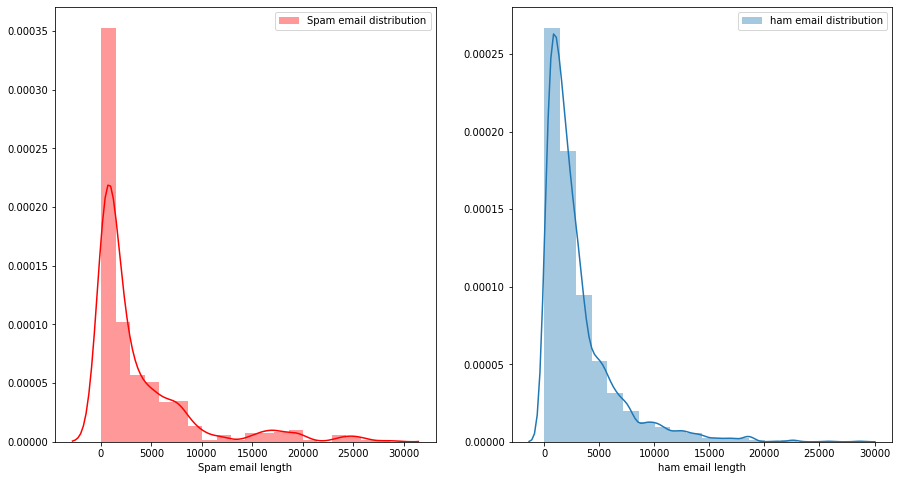

In [23]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(email[email['label']==1]['length'],bins=20,ax=ax[0],label='Spam email distribution',color='r')

ax[0].set_xlabel('Spam email length')
ax[0].legend()
sns.distplot(email[email['label']==0]['length'],bins=20,ax=ax[1],label='ham email distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()

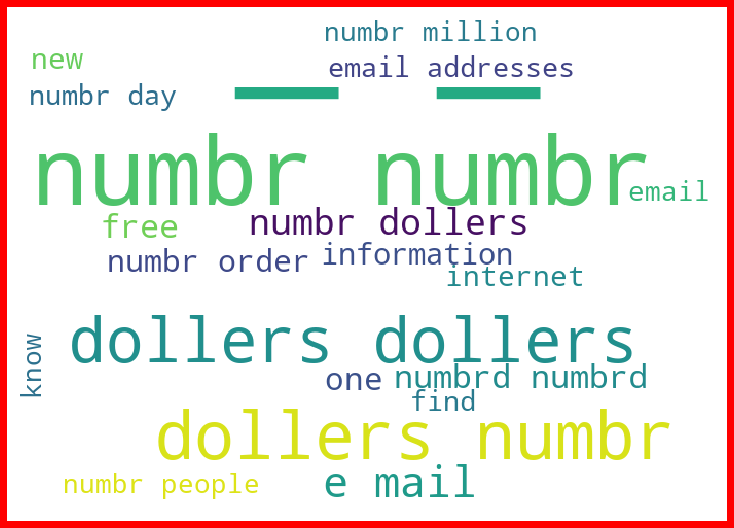

In [24]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud


Spams = email['message'][email['label']==1]

Spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

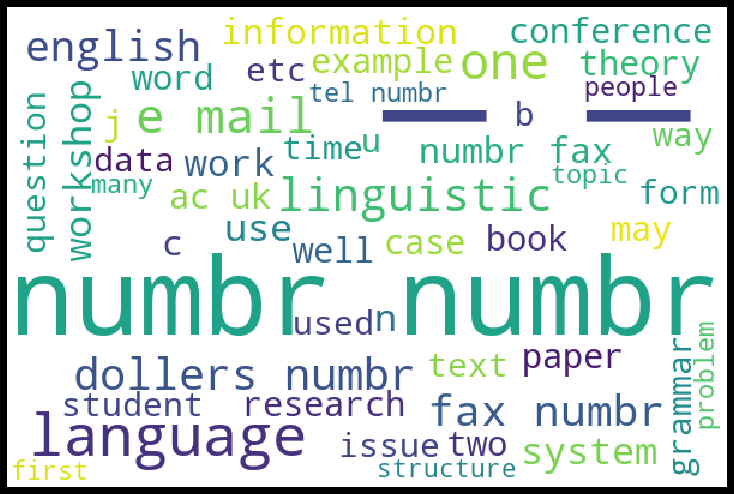

In [25]:
hams = email['message'][email['label']==0]
ham_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(email['message'])

X = features
y = email['label']

In [27]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=43)
naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8798342541436464


In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       619
           1       1.00      0.17      0.29       105

    accuracy                           0.88       724
   macro avg       0.94      0.59      0.61       724
weighted avg       0.89      0.88      0.84       724



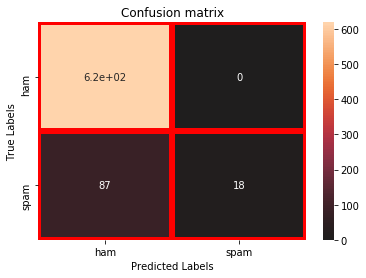

In [30]:
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [31]:
conf_mat

array([[619,   0],
       [ 87,  18]], dtype=int64)